## Hierarchical Clustering
Hierarchical clustering, also known as `hierarchical cluster analysis(HCI)`, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other. Real life example of Hierarchical clustering is our files and folder in our computer, which are stored in hierarchical manner.

#### There are two type of HCI
1. Agglomerative Hierarchical Clustering
2. Divisive Hierarchical Clustering

#### How Agglomerative Hierarchical Clustering works (overview)
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. This is illustrated in the diagrams below.
> <img src="https://i.makeagif.com/media/2-24-2014/DkJOLy.gif" width="500">

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters:
> <img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png" width="550" height="400">

### How Agglomerative Hierarchical Clustering works (Explanation)
As we discussed above, we first calculates the distance between each points and then we tries to find the two finds with least distance among all other points we then merge them and form a group. Now again we tries to find two points with least distance among all rest points and we merge them and form a new group, this process continues till we have only 1 group containing all other sub groups. Let's understand this with an example.

**`Example`** <br>
Suppose a teacher wants to divide her students into different groups. She has the marks scored by each student in an assignment and based on these marks, she wants to segment them into groups. There’s no fixed target here as to how many groups to have. Since the teacher does not know what type of students should be assigned to which group, it cannot be solved as a supervised learning problem. So, we will try to apply hierarchical clustering here and segment the students into different groups. **Let’s take a sample of 5 students:**
> <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-17-16-12-33.png" width="200" height="200">

#### Creating a Proximity Matrix (Distance Matrix)
First, we will create a proximity matrix which will tell us the distance between each of these points. Since we are calculating the distance of each point from each of the other points, we will get a square matrix of shape n X n (where n is the number of observations). The diagonal elements of this matrix will always be 0 as the distance of a point with itself is always 0. We will use the `Euclidean distance` formula to calculate the rest of the distances. We can also use other distance formula like `Manhattan Distance` 

So, let’s say we want to calculate the distance between point 1 and 2: `√(10-7)^2 = √9 = 3` Similarly, we can calculate all the distances and fill the proximity matrix.
> <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-46-36.png" width="200" height="200">


### Steps to Perform Hierarchical Clustering
**Step 1**: First, we assign all the points to an individual cluster:
> 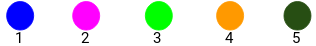

Different colors here represent different clusters. You can see that we have 5 different clusters for the 5 points in our data.

**Step 2**: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance. We then update the proximity matrix:
> 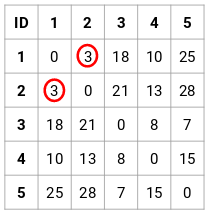

Here, the smallest distance is 3 and hence we will merge point 1 and 2:
> 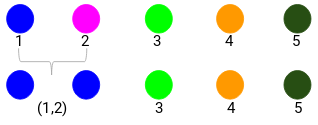

Let’s look at the updated clusters and accordingly update the proximity matrix:
> 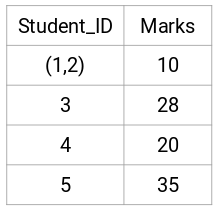

Here, we have taken the maximum of the two marks (7, 10) to replace the marks for this cluster. These are called `Linkage Crieteria`, we have 3 popular linkage crieteria 1) `single liknage` where we take minimum of the distance, 2) `complete linkage` in this we take maximum of the distances, and last but not least 3) `Average Linkage` in this we take average of the distance. 

Now, we will again calculate the proximity matrix for these clusters:
> 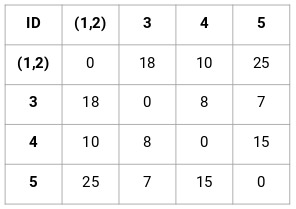

**Step 3**: We will repeat step 2 until only a single cluster is left.

So, we will first look at the minimum distance in the proximity matrix and then merge the closest pair of clusters. We will get the merged clusters as shown below after repeating these steps:
> 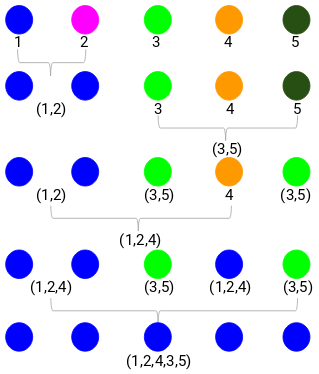

We started with 5 clusters and finally have a single cluster. This is how agglomerative hierarchical clustering works. But the burning question still remains – how do we decide the number of clusters? Let’s understand that in the next section.

### How should we Choose the Number of Clusters in Hierarchical Clustering?
Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. Let’s see how a dendrogram looks like:
> <img src="https://dashee87.github.io/images/hierarch.gif" width="600">

We have the samples of the dataset on the x-axis and the distance on the y-axis. Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Let’s build the dendrogram for our example:
> 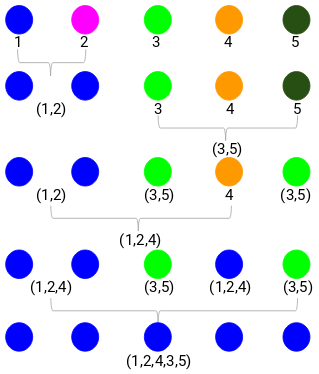

Take a moment to process the above image. We started by merging sample 1 and 2 and the distance between these two samples was 3 (refer to the first proximity matrix in the previous section). Let’s plot this in the dendrogram:
> 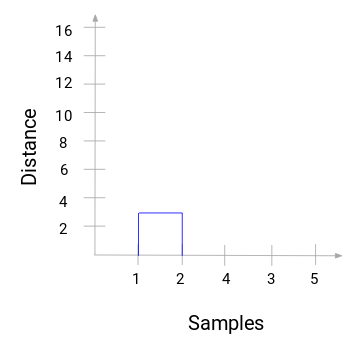

Here, we can see that we have merged sample 1 and 2. The vertical line represents the distance between these samples. Similarly, we plot all the steps where we merged the clusters and finally, we get a dendrogram like this:
> 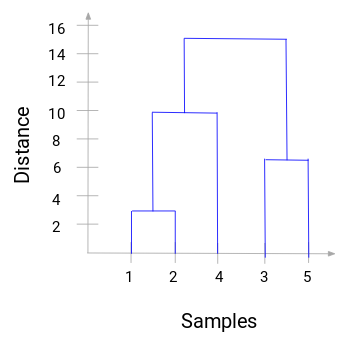

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line) which are not intersected by any horizontal line. Let’s set this threshold as 12 and draw a horizontal line:
> 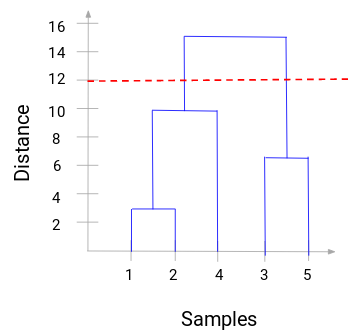

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). Pretty straightforward, right?

This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering.

**NOTE:** This awesome explanation of how Agglomerative Hierarchical Clustering works was picked from [**AnalyticsVidya**](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

### Divisive Hierarchical Clustering 
In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.
> <img src="https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/12/17-Hierarchical-Divisive-Clustering.png?ssl=1" width="500">

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

## Building Hierarchical Clustering Model

In [15]:
import pandas as pd # <-- for handling dataset
from sklearn.cluster import AgglomerativeClustering # <-- for building hierarchical clustering model
from sklearn.metrics import silhouette_score # <-- for measuring model performance
import matplotlib.pyplot as plt # <-- for visualizing
import seaborn as sns # <--- for visualizing
from scipy.cluster import hierarchy as sch # <-- for creating dendogram

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(10, random_state=49)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
107,108,Male,54,63,46
144,145,Male,25,77,12
104,105,Male,49,62,56
195,196,Female,35,120,79
153,154,Female,38,78,76
65,66,Male,18,48,59
150,151,Male,43,78,17
180,181,Female,37,97,32
17,18,Male,20,21,66
46,47,Female,50,40,55


In [5]:
# separating features 
features = df.iloc[:, [3,4]]
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


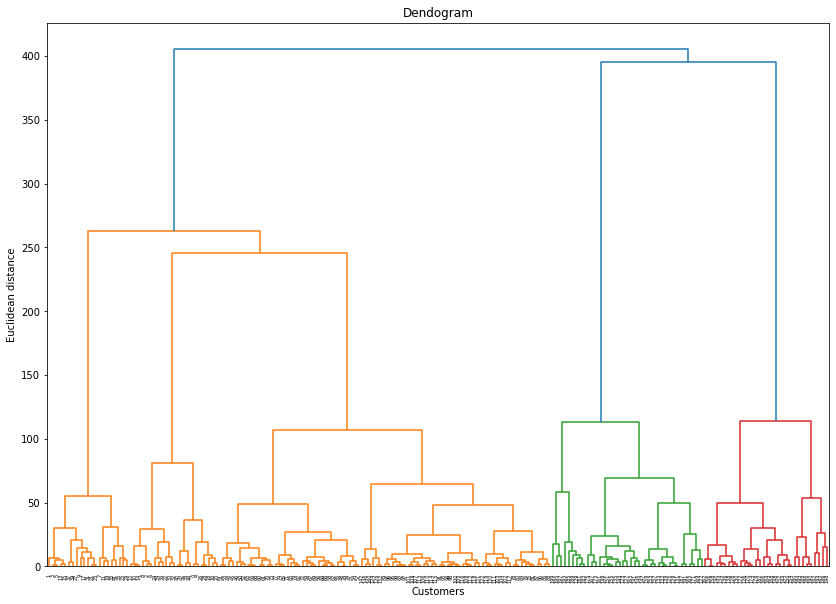

In [9]:
# let's create Dendogram to decide the optimal number of cluster
plt.figure(figsize=(14, 10))
dendogram = sch.dendrogram(sch.linkage(features, "ward"))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

So the longest non intersected line seems to be from `110-240`, so if we intersect that line with horizontal line we will get 5 vertical lines. So we can say 5 cluster will be optimal.

In [10]:
# let's build our model
model = AgglomerativeClustering(n_clusters=5)
model.fit(features)

AgglomerativeClustering(n_clusters=5)

In [11]:
# let's see our clusters
clusters = model.labels_
print(set(clusters))

{0, 1, 2, 3, 4}


In [12]:
df['class'] = clusters

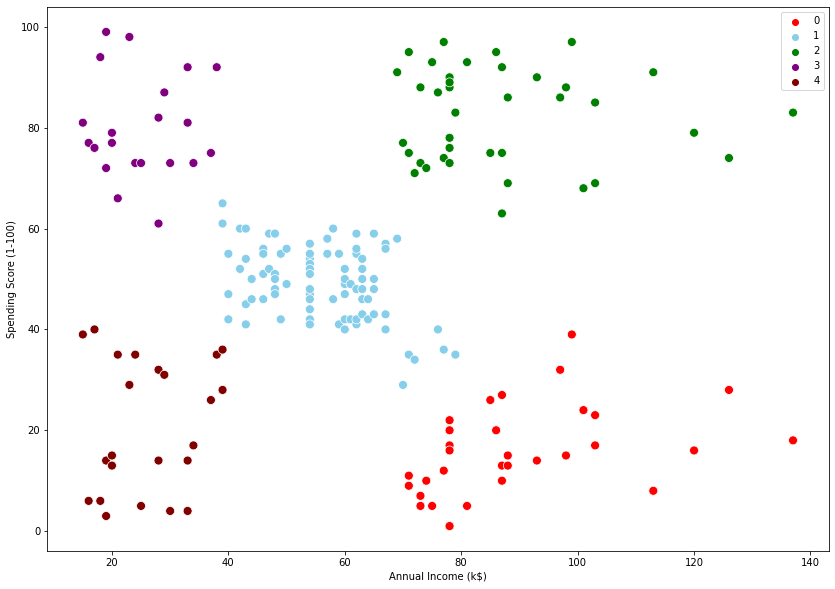

In [14]:
c = ['red', 'skyblue', 'green', 'purple', 'maroon']
plt.figure(figsize=(14, 10))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['class'], s=80, palette=c)
plt.legend()
plt.show()

In [16]:
# let's check the model score with silhouette_score
silhouette_score(features, clusters)

0.5529945955148897

Silhouette Score ranges from -1 to 1, so our score is average and can be considered as okay but not the best. This score can be improved if we remove some outliers from the model. 